In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### National Vulnerability Database (NVD)


In [2]:
df = pd.read_csv('../data/nvd/all-nvd-patches.csv', escapechar="\\")
df.head()

,cve_id,year,cwes,description,severity,exploitability,impact,published_date,last_modified_date,refs,code_refs
0,CVE-2021-20193,2021,"{'CWE-125', 'CWE-401'}",A flaw was found in the src/list.c of tar 1.33...,MEDIUM,8.6,2.9,2021-03-26T17:15Z,2021-06-03T18:53Z,{'https://bugzilla.redhat.com/show_bug.cgi?id=...,{'https://git.savannah.gnu.org/cgit/tar.git/co...
1,CVE-2021-20230,2021,{'CWE-295'},"A flaw was found in stunnel before 5.57, where...",MEDIUM,10.0,2.9,2021-02-23T17:15Z,2021-05-26T10:15Z,{'https://github.com/mtrojnar/stunnel/commit/e...,{'https://github.com/mtrojnar/stunnel/commit/e...
2,CVE-2021-20261,2021,{'CWE-362'},A race condition was found in the Linux kernel...,MEDIUM,3.4,6.4,2021-03-11T21:15Z,2021-03-19T13:08Z,{'https://git.kernel.org/pub/scm/linux/kernel/...,{'https://git.kernel.org/pub/scm/linux/kernel/...
3,CVE-2021-20265,2021,{'CWE-400'},A flaw was found in the way memory resources w...,MEDIUM,3.9,6.9,2021-03-10T16:15Z,2021-12-08T19:47Z,{'https://bugzilla.redhat.com/show_bug.cgi?id=...,{'https://git.kernel.org/pub/scm/linux/kernel/...
4,CVE-2021-20271,2021,{'CWE-345'},A flaw was found in RPM's signature check func...,MEDIUM,4.9,6.4,2021-03-26T17:15Z,2021-12-10T19:50Z,"{'https://security.gentoo.org/glsa/202107-43',...",{'https://github.com/rpm-software-management/r...


#### Severity Distribution

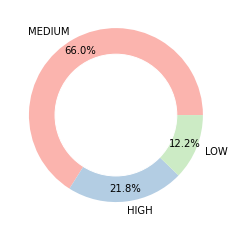

In [4]:
from palettable.colorbrewer.qualitative import Pastel1_7

my_circle = plt.Circle((0, 0), 0.7, color='white')

plt.pie(df['severity'].value_counts(), 
        colors=Pastel1_7.hex_colors, 
        labels=df['severity'].value_counts().keys(),
        autopct='%1.1f%%', 
        pctdistance=0.85)

p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [6]:
f"{len(df['cve_id'].unique())} unique CVE entries"

'8523 unique CVE entries'

In [7]:
df = pd.read_csv('../data/nvd/github-nvd-patches.csv', escapechar="\\")
df.head()

,cve_id,year,cwes,description,severity,exploitability,impact,published_date,last_modified_date,refs,code_refs,commits
0,CVE-2021-20230,2021,{'CWE-295'},"A flaw was found in stunnel before 5.57, where...",MEDIUM,10.0,2.9,2021-02-23T17:15Z,2021-05-26T10:15Z,{'https://github.com/mtrojnar/stunnel/commit/e...,{'https://github.com/mtrojnar/stunnel/commit/e...,{'https://github.com/mtrojnar/stunnel/commit/e...
1,CVE-2021-20271,2021,{'CWE-345'},A flaw was found in RPM's signature check func...,MEDIUM,4.9,6.4,2021-03-26T17:15Z,2021-12-10T19:50Z,"{'https://security.gentoo.org/glsa/202107-43',...",{'https://github.com/rpm-software-management/r...,{'https://github.com/rpm-software-management/r...
2,CVE-2021-21234,2021,{'CWE-22'},spring-boot-actuator-logview in a library that...,MEDIUM,8.0,2.9,2021-01-05T18:15Z,2021-01-11T14:41Z,{'https://github.com/lukashinsch/spring-boot-a...,{'https://github.com/lukashinsch/spring-boot-a...,{'https://github.com/lukashinsch/spring-boot-a...
3,CVE-2021-21235,2021,{'CWE-400'},kamadak-exif is an exif parsing library writte...,MEDIUM,8.6,2.9,2021-01-06T02:15Z,2021-01-08T19:23Z,"{'https://crates.io/crates/kamadak-exif', 'htt...",{'https://github.com/kamadak/exif-rs/commit/f2...,{'https://github.com/kamadak/exif-rs/commit/f2...
4,CVE-2021-21236,2021,{'CWE-400'},CairoSVG is a Python (pypi) package. CairoSVG ...,MEDIUM,8.6,2.9,2021-01-06T17:15Z,2021-01-13T15:43Z,"{'https://pypi.org/project/CairoSVG/', 'https:...",{'https://github.com/Kozea/CairoSVG/commit/cfc...,{'https://github.com/Kozea/CairoSVG/commit/cfc...


In [8]:
f"{len(df['cve_id'].unique())} unique CVE entries"

'7316 unique CVE entries'

In [13]:
cwes = []
for idx, row in df.iterrows():
    if pd.notna(row['cwes']):
        for cwe in eval(row['cwes']):
            if ',' in cwe:
                print(cwe)
        cwes += list(eval(row['cwes']))
pd.Series(cwes).value_counts()

CWE-79     1011
CWE-125     498
CWE-119     421
CWE-20      418
CWE-787     315
           ... 
CWE-114       1
CWE-350       1
CWE-694       1
CWE-208       1
CWE-786       1
Length: 200, dtype: int64